In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
gt_df_005 = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/groundtruth_variation/groundtruth_variation_results_005.csv", index_col=0)
gt_df_001 = pd.read_csv("/home/wollerf/Projects/GRN-FinDeR_Results.git/results/manuscript/groundtruth_variation/groundtruth_variation_results_001.csv", index_col=0)
approx_results_path = "../../results/manuscript/groundtruth_variation/random_100_targets_wasserstein_against_ten_groundtruths.csv"
approx_df = pd.read_csv(approx_results_path)
approx_df = approx_df[approx_df['tissue'].isin(['Breast', 'Testis', 'Kidney'])]
approx_df

,tissue,num_non_tfs,num_tfs,mae,groundtruth,f1_005,f1_001,abs_time_saving,rel_time_saving,abs_emission_saving,rel_emission_saving,total_runtime
0,Breast,100,-1,0.013957,groundtruth_batches_0,0.840109,0.873463,316324.989131,98.535838,9.483144,80.035294,3243.166775
1,Breast,100,-1,0.013940,groundtruth_batches_1,0.839251,0.874220,317337.676056,98.848090,12.630452,106.265881,3243.166775
2,Breast,100,-1,0.013944,groundtruth_batches_2,0.839856,0.873486,330133.024721,102.793416,12.968073,109.079708,3243.166775
3,Breast,100,-1,0.013913,groundtruth_batches_3,0.840418,0.874452,329734.822340,102.670634,12.894558,108.467017,3243.166775
4,Breast,100,-1,0.013915,groundtruth_batches_4,0.840551,0.873078,332390.350312,103.489441,12.938080,108.829735,3243.166775
5,Breast,100,-1,0.013899,groundtruth_batches_5,0.840624,0.873568,327434.080267,101.961222,12.852494,108.116439,3243.166775
6,Breast,100,-1,0.013912,groundtruth_batches_6,0.839868,0.873634,317478.686128,98.891570,12.467853,104.910728,3243.166775
7,Breast,100,-1,0.013857,groundtruth_batches_7,0.841443,0.874441,316658.157673,98.638567,12.449038,104.753924,3243.166775
8,Breast,100,-1,0.013873,groundtruth_batches_8,0.840539,0.874067,318074.550386,99.075299,12.495641,105.142319,3243.166775
9,Breast,100,-1,0.013922,groundtruth_batches_9,0.840660,0.874276,317059.144226,98.762208,12.466831,104.902216,3243.166775


In [7]:
df_005 = gt_df_005[['gtA', 'gtB', 'f1', 'tissue']].rename(columns={'f1': 'f1_005'})

# Select and rename columns in gt_df_001
df_001 = gt_df_001[['gtA', 'gtB', 'f1', 'tissue']].rename(columns={'f1': 'f1_001'})

# Merge on gtA and gtB
merged_df = pd.merge(df_005, df_001, on=['gtA', 'gtB', 'tissue'])

merged_df = merged_df.rename(columns={'gtA': 'num_non_tfs', 'gtB': 'num_tfs'})
merged_df['mode'] = "groundtruth"
approx_df['mode'] = "approx"

total_df = pd.concat([merged_df, approx_df], ignore_index=True, sort=False)
total_df['tissue'] = total_df['tissue'].str.capitalize()
total_df['mode'] = total_df['mode'].replace({'approx': "Approximate vs. groundtruth", "groundtruth": "Groundtruth vs. groundtruth"})
total_df

,num_non_tfs,num_tfs,f1_005,tissue,f1_001,mode,mae,groundtruth,abs_time_saving,rel_time_saving,abs_emission_saving,rel_emission_saving,total_runtime
0,0,1,0.838485,Breast,0.872654,Groundtruth vs. groundtruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0.871604,Kidney,0.811468,Groundtruth vs. groundtruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,0.861309,Testis,0.888382,Groundtruth vs. groundtruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,0.838844,Breast,0.871751,Groundtruth vs. groundtruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2,0.870062,Kidney,0.808507,Groundtruth vs. groundtruth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,100,-1,0.861219,Testis,0.891432,Approximate vs. groundtruth,0.012394,groundtruth_batches_5,339855.053497,96.412020,13.094824,103.858733,3561.973151
296,100,-1,0.862517,Testis,0.892018,Approximate vs. groundtruth,0.012283,groundtruth_batches_6,331527.842607,94.074212,12.794904,101.502882,3561.973151
297,100,-1,0.863280,Testis,0.891432,Approximate vs. groundtruth,0.012232,groundtruth_batches_7,332887.307915,94.455872,12.820242,101.701914,3561.973151
298,100,-1,0.860867,Testis,0.889981,Approximate vs. groundtruth,0.012435,groundtruth_batches_8,332934.610321,94.469152,12.872591,102.113106,3561.973151


In [8]:
def format_ticks(y, _):
        # Format with 2 decimals
        s = f'{y:.3f}'
        # Remove trailing zeros and dot if needed
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        # Remove leading zero before decimal point
        if s.startswith('0.') or s.startswith('-0.'):
            s = s.replace('0.', '.')
        return s

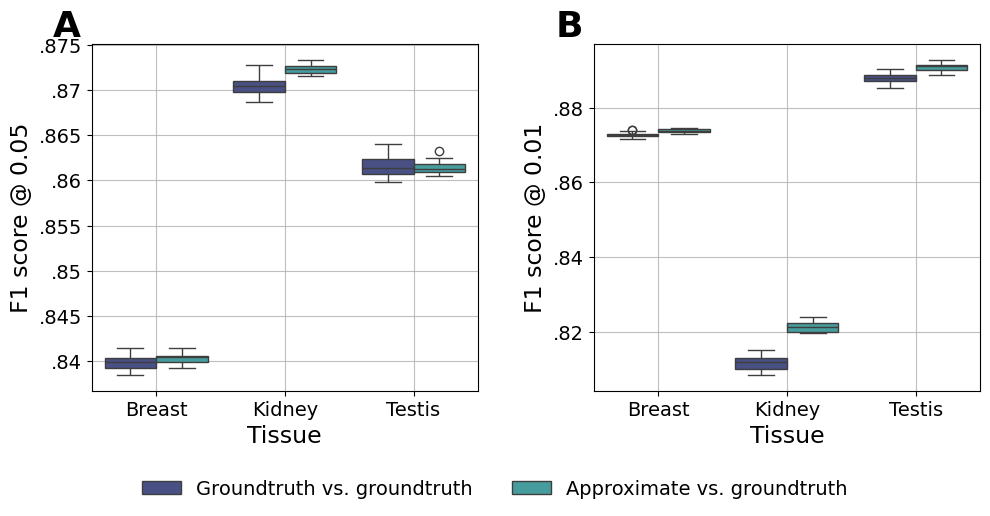

In [9]:
fig, axs = plt.subplot_mosaic([['A', 'B']])
fig.set_size_inches(10, 5)
axs_list = list(axs.values())
label_fontsize = 17

# Plot A
sns.boxplot(data=total_df, x='tissue', y='f1_005', hue="mode", ax=axs['A'], palette="mako")
axs['A'].set_xlabel('Tissue', fontsize=label_fontsize)
axs['A'].set_ylabel('F1 score @ 0.05', fontsize=label_fontsize)
axs['A'].tick_params(axis='x', labelsize=label_fontsize-3)
axs['A'].tick_params(axis='y', labelsize=label_fontsize-3)
axs['A'].yaxis.set_major_formatter(FuncFormatter(format_ticks))
axs['A'].grid(True, alpha=0.8)

# Plot B
sns.boxplot(data=total_df, x='tissue', y='f1_001', hue="mode", ax=axs['B'], palette="mako")
axs['B'].set_xlabel('Tissue', fontsize=label_fontsize)
axs['B'].set_ylabel('F1 score @ 0.01', fontsize=label_fontsize)
axs['B'].tick_params(axis='x', labelsize=label_fontsize-3)
axs['B'].tick_params(axis='y', labelsize=label_fontsize-3)
axs['B'].yaxis.set_major_formatter(FuncFormatter(format_ticks))
axs['B'].grid(True, alpha=0.8)

# Remove individual legends
axs['A'].legend_.remove()
axs['B'].legend_.remove()

# Create a shared legend below both plots
handles, labels = axs['A'].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),  # Push legend slightly below the figure
    ncol=len(labels),
    fontsize=14,
    frameon=False
)

# Add subplot labels
labels = {'A': 'A', 'B': 'B'}
for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.1, label,
        transform=ax.transAxes,
        fontsize=26,
        fontweight='bold',
        va='top',
        ha='left'
    )

# Adjust spacing to make room for the legend
fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.2)

plt.savefig("updated_pairwise_groundtruths_breast_kidney_testis.pdf", format='pdf', bbox_inches='tight')
